In [1]:
### Creación del modelo

In [2]:
# importamos las librerias necesarias
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\sebas\AppData\Local\Temp\ipykernel_27152\2931000871.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
#Se leen los datos una vez limpiados
path = 'C:/Users/sebas/Escritorio/Analitica/analiticaComputacionalProyecto1/data/cleanData.csv'
data = pd.read_csv(path,index_col=0)
#Revisamos el tamaño de los datos y su resumen
print(data.shape)
data.head()

(1197, 16)


,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,quarterEncoded,dayEncoded,productivity_indicator
date,,,,,,,,,,,,,,,,
1/1/2015,Quarter1,1,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,0,3,0.140725
1/1/2015,Quarter1,0,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,0,3,0.136500
1/1/2015,Quarter1,1,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,0,3,0.000570
1/1/2015,Quarter1,1,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,0,3,0.000570
1/1/2015,Quarter1,1,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,0,3,0.000382


In [4]:
#COMPORTAMIENTO DE LAS VARIABLES
data.describe()

,department,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,quarterEncoded,dayEncoded,productivity_indicator
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,0.577277,6.426901,0.729632,15.062172,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091,1.399332,2.487051,0.005459
std,0.494199,3.463963,0.097891,10.943219,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488,1.215535,1.707511,0.160082
min,0.000000,1.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705,0.000000,0.000000,-0.561958
25%,0.000000,3.000000,0.700000,3.940000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307,0.000000,1.000000,-0.009556
50%,1.000000,6.000000,0.750000,15.260000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333,1.000000,2.000000,0.000505
75%,1.000000,9.000000,0.800000,24.260000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253,2.000000,4.000000,0.099111
max,1.000000,12.000000,0.800000,54.560000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437,4.000000,5.000000,0.644375


C:\Users\sebas\AppData\Local\Temp\ipykernel_27152\3456060974.py:14: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


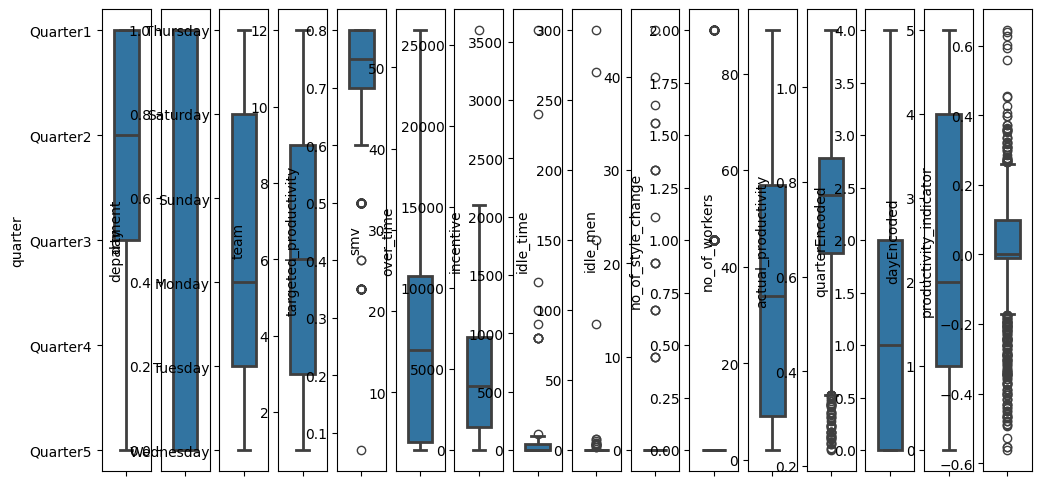

In [5]:
# Crear una visualizacion para las graficas
plt.figure(figsize=(12, 6))

# Sacar el numero de variables
num_variables = data.shape[1]

# Crear un boxplot para cada variable
for i in range(num_variables):
    plt.subplot(1, num_variables, i+1)
    sns.boxplot(y=data.iloc[:, i], width=0.5, linewidth=2)
    plt.ylabel(data.columns[i]) 

# Evitar que las graficas se sobrelapen
plt.tight_layout()

# Mostrar el plot
plt.show()

In [6]:
#Creacion del modelo: Explicacion de por qué se escoge un modelo de regresion
#ToDo

## Creacion del modelo Lineal

In [7]:
#se intenta mediante sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
# Eleccion de variables de interes
features = ['dayEncoded','quarterEncoded','department','over_time','incentive']
x = data[features]
x = x.reset_index(drop=True)
print(data.shape)
x.head()

(1197, 16)


,dayEncoded,quarterEncoded,department,over_time,incentive
0,3,0,1,7080,98
1,3,0,0,960,0
2,3,0,1,3660,50
3,3,0,1,3660,50
4,3,0,1,1920,50


### Definimos la variable de respuesta

In [9]:
y = data['productivity_indicator']
y = y.reset_index(drop=True)
print(y.shape)
y.head()

(1197,)


0    0.140725
1    0.136500
2    0.000570
3    0.000570
4    0.000382
Name: productivity_indicator, dtype: float64

In [10]:
#Separacion entre datos de train y test

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.2)

# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(957, 5)
(957,)
(240, 5)
(240,)


In [11]:
#Utilizando statsmodel
import statsmodels.api as sm
# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_train, y_train)

# imprimir coeficientes
#print(linreg.intercept_)
# coeficientes con nombre de las características
#list(zip(features, linreg.coef_))
# agregar constante explícitamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

0.007369517082681501


[('dayEncoded', -0.001840904883643931),
 ('quarterEncoded', -6.593454646917766e-05),
 ('department', -0.026330854384773752),
 ('over_time', 2.957337932342217e-06),
 ('incentive', 0.00011051183231951054)]

### Usamos el modelo para predecir los datos de validacion

In [12]:
y_pred = linreg.predict(X_test)
y_pred

array([ 1.03656384e-02,  8.65480057e-04, -3.12358156e-03,  2.35762474e-03,
        1.07199514e-02,  7.03870919e-03,  1.15621492e-02,  6.90707699e-03,
        1.21624111e-02,  3.13388797e-03,  1.09183226e-02,  1.31370455e-02,
        4.41829770e-03,  1.02085615e-02,  1.26267908e-02,  2.84494196e-03,
        5.64631009e-03, -2.41495561e-03, -1.30956741e-04,  1.54652677e-02,
        1.00403708e-03,  9.29986160e-03, -3.68259380e-04,  6.52675173e-03,
       -1.67389675e-03, -3.47846211e-03,  7.23651283e-03,  2.84494196e-03,
        9.12351524e-07,  5.97349996e-03,  9.72124428e-03, -4.38716201e-03,
        1.25597211e-02,  2.08647102e-03,  1.02650027e-02,  8.30172207e-03,
        4.95441785e-03,  1.17497222e-02, -1.07212192e-02,  1.11798017e-02,
        5.97784559e-03, -1.11431355e-02, -2.65663723e-04,  1.02085615e-02,
        4.82856564e-03,  1.66440621e-01,  7.87709600e-03, -5.88646587e-03,
       -2.47505028e-03,  1.35891763e-03,  1.36914325e-02, -5.74188483e-03,
        5.30642144e-03,  

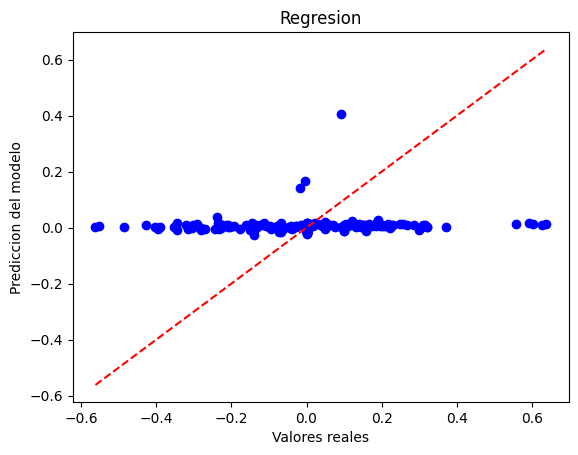

In [13]:
# Hacer predicciones en el conjunto de prueba
y_pred = linreg.predict(X_test)

# Graficar las predicciones vs los valores reales
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')  # Línea de referencia y=x
plt.xlabel('Valores reales')
plt.ylabel('Prediccion del modelo')
plt.title('Regresion')
plt.show()

### Evaluamos las métricas del modelo

In [14]:
#Importacion de clases para las métricas de evaluacion
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [15]:
# mean absolute error
MAE = metrics.mean_absolute_error(y_test, y_pred)

# mean squared error
MSE = metrics.mean_squared_error(y_test, y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)

# Calcular el coeficiente de determinación (R²)
r2 = metrics.r2_score(y_test, y_pred)

print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  0.11700014931743447
MSE:  0.032152598957270476
RMSE:  0.1793114579642653


### Metricas con validacion cruzada

In [16]:
#Evaluacion del modelo con validacion cruzada
#ToDo
#Evaluar con diferentes métricas en scoring( Preguntar a juanfer)
scores = cross_val_score(linreg, x, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = - scores
print(mse_scores)

[0.01665662 0.02850933 0.03035801 0.03362469 0.99829898]


In [17]:
# calcular RMSE
#ToDo
# Ademas de esto analizar mas funciones de perdida

rmse_scores = np.sqrt(mse_scores)
print("El error calculado por RMSE es {} ".format(rmse_scores))
# RMSE promedio a través de todos los grupos
print("El RMSE promedio es {} ".format(rmse_scores.mean()))

El error calculado por RMSE es [0.12906054 0.16884705 0.17423549 0.18337037 0.99914913] 
El RMSE promedio es 0.3309325173154806 


### Evaluacion usando pruebas estadisticas

In [24]:
#Utilizando statsmodel
import statsmodels.api as sm

# agregar constante explícitamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados

print(model.summary())
print(model.rsquared)
print(model.rsquared_adj)
print(model.params)
print(model.fvalue)
print(model.tvalues)
print(model.bse)
print(model.pvalues)



                              OLS Regression Results                              
Dep. Variable:     productivity_indicator   R-squared:                       0.011
Model:                                OLS   Adj. R-squared:                  0.006
Method:                     Least Squares   F-statistic:                     2.155
Date:                    Mon, 11 Mar 2024   Prob (F-statistic):             0.0570
Time:                            22:27:44   Log-Likelihood:                 432.19
No. Observations:                     957   AIC:                            -852.4
Df Residuals:                         951   BIC:                            -823.2
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
cons

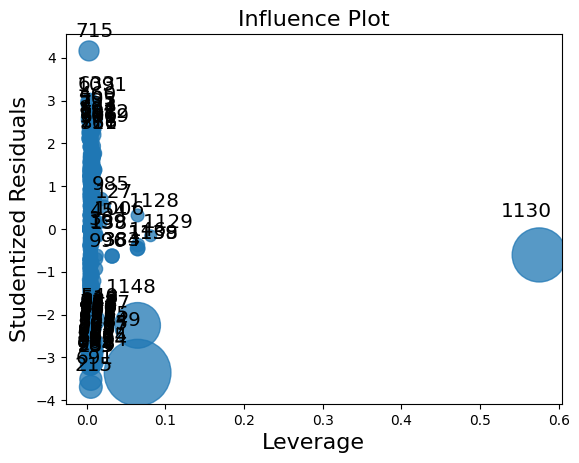

In [19]:
#Creacion de influence plot
fig = sm.graphics.influence_plot(model, criterion="cooks")